**Simple Linear regression model that predicts the actual weight of some imported items.**

In [1]:
#Importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
#Reading the dataset
df= pd.read_csv("data.csv")

In [3]:
df.head()

,valid_import,item,importer_id,exporter_id,country_of_origin,declared_quantity,declared_cost,mode_of_transport,route,date_of_departure,date_of_arrival,declared_weight,actual_weight,days_in_transit
0,True,cigar,111,222,India,129,3784.402551,sea,asia,04/25/2019,05/13/2019,1608.605135,1637.661221,18.232857
1,True,cigar,111,222,India,104,3081.350806,sea,america,04/22/2019,05/24/2019,831.719301,848.273419,32.436029
2,True,cigar,111,222,India,130,4414.125741,sea,europe,04/29/2019,05/16/2019,1527.704165,1582.063911,16.996206
3,True,cigar,111,222,India,143,2533.535991,sea,panama,05/05/2019,05/25/2019,1138.680563,1179.993817,19.965886
4,True,cigar,111,222,China,141,4396.397887,sea,asia,05/14/2019,06/05/2019,761.744581,781.735080,22.160034


In [5]:
#variable types
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valid_import       120 non-null    bool   
 1   item               120 non-null    object 
 2   importer_id        120 non-null    int64  
 3   exporter_id        120 non-null    int64  
 4   country_of_origin  120 non-null    object 
 5   declared_quantity  120 non-null    int64  
 6   declared_cost      120 non-null    float64
 7   mode_of_transport  120 non-null    object 
 8   route              120 non-null    object 
 9   date_of_departure  120 non-null    object 
 10  date_of_arrival    120 non-null    object 
 11  declared_weight    120 non-null    float64
 12  actual_weight      120 non-null    float64
 13  days_in_transit    120 non-null    float64
dtypes: bool(1), float64(4), int64(3), object(6)
memory usage: 12.4+ KB


**Are there null values?**

In [6]:
df.isnull().sum()

valid_import         0
item                 0
importer_id          0
exporter_id          0
country_of_origin    0
declared_quantity    0
declared_cost        0
mode_of_transport    0
route                0
date_of_departure    0
date_of_arrival      0
declared_weight      0
actual_weight        0
days_in_transit      0
dtype: int64

No, there aren't null values. 

In [8]:
#Checking some statical data about the dataset
df.describe()

,importer_id,exporter_id,declared_quantity,declared_cost,declared_weight,actual_weight,days_in_transit
count,120.0,120.0,120.000000,120.000000,120.000000,120.000000,120.000000
mean,111.0,222.0,127.458333,6743.649881,1264.702934,1306.429806,35.424705
std,0.0,0.0,14.641311,2991.797050,633.149971,656.911704,26.571591
min,111.0,222.0,100.000000,1441.012419,18.459509,19.275241,12.410325
25%,111.0,222.0,115.750000,4442.903914,820.314400,841.763738,18.225625
50%,111.0,222.0,131.500000,6010.218745,1255.597743,1305.716419,27.044293
75%,111.0,222.0,139.000000,8887.095370,1711.314045,1763.681083,44.356374
max,111.0,222.0,149.000000,14281.325362,2806.338955,2918.681683,147.787560


**Are there possible Outliers?**

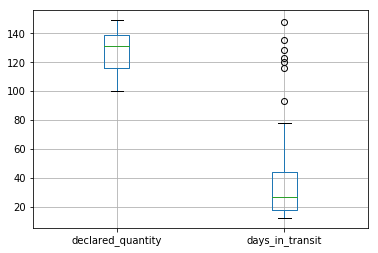

In [10]:
#Identifying possible outliers in the following features
df[['declared_quantity','days_in_transit']].boxplot()

Yes. Its possible to note that there are possible outliers. There are several points above the superior limit in the variable 'days_in_transit'. However, a deeper analysis in these case need to be made.

***Regression Analysis***

In [11]:
#separating the dependent and independent variables

x=df['declared_weight'].values  #independent variables
Y=df['actual_weight'].values #dependent variable 

In [12]:
#Importing Linear regression
from sklearn.linear_model import LinearRegression

In [14]:
#Building and training the linear regression model
reg= LinearRegression()
x_Reshaped=x.reshape((-1, 1)) #reshaping to 2 dimensions
regressao= reg.fit (x_Reshaped,Y) # training the model

In [15]:
#Predicting values
previsao=reg.predict(x_Reshaped)

In [16]:
#Model analysis
from sklearn.metrics import r2_score #importing correlation coeficient

In [17]:
#Printing the value for R_2 score
print('Y = {}X {}'.format(reg.coef_,reg.intercept_))

R_2 = r2_score(Y, previsao)  #Calculating R_2 score

print("Correlation coefficient (R2):", R_2)


Y = [1.03718115]X -5.2962330304399075
Correlation coefficient (R2): 0.9993288165644932


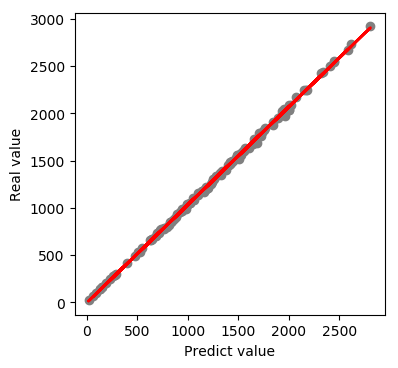

In [19]:
#Comparing the real values with the predict values by the model

plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(x, Y,  color='gray') 
plt.plot(x, previsao, color='red', linewidth=2)
plt.xlabel("Predict value")
plt.ylabel("Real value")
plt.show()

**By the Coefficient of Determination, what is it possible to say about the relationship between the variables Actual Weight x Declared Weight?**


The Determination Coefficient (R2) found has a value of 0.9993288165644932. In this case, this coefficient is expressing that the amount of variance of the data that is explained by the linear model is approximately 99%, that is, the coefficient is indicating that the model was able to explain 99% of the collected data.

By analyzing the graph, it is possible to notice that the "red" line (data prediction) fits very well with the actual data (scatter plot, "gray" points).